<a href="https://colab.research.google.com/github/daniellmarc/reweighted-dns/blob/main/Readable_GW190425_galacticmass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rework of GW190425 into Pandas and into a more presentable format**

Side Note: I matched the Emojis when grabbing the data and using that data

# Imports

In [ ]:
! pip install pesummary
import pesummary

     |████████████████████████████████| 1.1 MB 14.0 MB/s 
     |████████████████████████████████| 1.4 MB 42.2 MB/s 
     |████████████████████████████████| 2.3 MB 48.0 MB/s 
     |████████████████████████████████| 46.2 MB 193 kB/s 
     |████████████████████████████████| 2.3 MB 29.1 MB/s 
     |████████████████████████████████| 51 kB 5.2 MB/s 
     |████████████████████████████████| 11.2 MB 39.4 MB/s 
     |████████████████████████████████| 1.4 MB 41.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 895 kB 36.8 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 3.6 MB 38.7 MB/s 
     |████████████████████████████████| 2.6 MB 42.4 MB/s 
     |████████████████████████████████| 295 kB 40.5 MB/s 
     |████████████████████████████████| 55 kB 2.2 MB/s 
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp3

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
! pip install matplotlib==3.1.3 # An error keeps popping up when i had to plot " : cannot import name '_png' from 'matplotlib' ". So I did this

     |████████████████████████████████| 13.1 MB 22.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 2.1.3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
! git clone https://github.com/landryp/sodapop.git # only need to run this once
import sys
sys.path.insert(0,'/content/sodapop')
import sodapop.priors as prior
import sodapop.populations as pop

Cloning into 'sodapop'...
remote: Enumerating objects: 664, done.
remote: Counting objects: 100% (664/664), done.
remote: Compressing objects: 100% (456/456), done.
remote: Total 664 (delta 348), reused 519 (delta 205), pack-reused 0
Receiving objects: 100% (664/664), 2.75 MiB | 17.70 MiB/s, done.
Resolving deltas: 100% (348/348), done.


In [ ]:
! pip install corner
import corner

In [ ]:
import matplotlib.pyplot as plt
import pesummary
from pesummary.io import read
print(pesummary.__version__)
import h5py
%matplotlib inline
%config InlineBackend.figure_format='retina'

0.13.3


In [ ]:
# !tar -xvf "/content/GW190412.tar" -C "/content/drive/path/output_folder/"     #[run this cell to extract tar files]

# Bringing the Data given from Public Link. Read and visualize parameter samples from public LVK paper results on GW190425

In [ ]:
##GWTC-2 Data Release: Parameter Estimation Samples and Skymaps THE PROPER ONE 
public_dcc_url= 'https://dcc.ligo.org/public/0169/P2000223/007/'

In [ ]:
!curl -O {public_dcc_url}"GW190425.tar"
# !curl -O {public_dcc_url}"low_spin_PhenomPNRT_posterior_samples.dat.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1179M  100 1179M    0     0  40.2M      0  0:00:29  0:00:29 --:--:-- 42.4M


In [ ]:
!tar -xvf "/content/GW190425.tar" -C "/content/"     #[run this cell to extract tar files]
# !tar -xvf "/content/drive/path/GW190425.tar" -C "/content/drive/path/output_folder/"     #[run this cell to extract tar files]

GW190425/
GW190425/GW190425.h5
GW190425/GW190425_comoving.h5
GW190425/GW190425_AlignedSpinInspiralTidal_LS.fits
GW190425/GW190425_AlignedSpinTidal_HS.fits
GW190425/GW190425_AlignedSpinTidal_LS.fits
GW190425/GW190425_C01:IMRPhenomD_NRTidal-LS.fits
GW190425/GW190425_C01:TaylorF2-HS.fits
GW190425/GW190425_C01:IMRPhenomPv2_NRTidal-HS.fits
GW190425/GW190425_C01:IMRPhenomPv2_NRTidal-LS.fits
GW190425/GW190425_C01:SEOBNRv4T_surrogate_HS.fits
GW190425/GW190425_C01:SEOBNRv4T_surrogate_lowspin_RIFT.fits
GW190425/GW190425_C01:SEOBNRv4T_surrogate_LS.fits
GW190425/GW190425_C01:TaylorF2-LS.fits
GW190425/GW190425_C01:TEOBResumS-HS.fits
GW190425/GW190425_C01:TEOBResumS-LS.fits
GW190425/GW190425_PrecessingSpinIMRTidal_HS.fits
GW190425/GW190425_PrecessingSpinIMRTidal_LS.fits
GW190425/GW190425_PublicationSamples.fits
GW190425/GW190425_AlignedSpinInspiralTidal_HS.fits
GW190425/GW190425_C01:IMRPhenomD_NRTidal-HS.fits
GW190425/GW190425_C01:SEOBNRv4T_surrogate_highspin_RIFT.fits


In [ ]:
data = h5py.File('/content/GW190425/GW190425.h5','r')
# print(data['C01:IMRPhenomD_NRTidal-HS']['posterior_samples'][0])
# print(list(data['C01:IMRPhenomD_NRTidal-HS']['posterior_samples'].keys))

print(data.keys())
posterior_samples = data['C01:IMRPhenomD_NRTidal-HS']['posterior_samples']
pnames = posterior_samples.dtype.names
print('\n\n List of Parameters:')
print(pnames, '\n')
#data = pd.DataFrame(posterior_samples) # 
data = pd.DataFrame(posterior_samples[0:1000]) #Comment this line out if you want to run through the entire posterior_samples. This process takes awhile. 
print(data) 

<KeysViewHDF5 ['AlignedSpinInspiralTidal_HS', 'AlignedSpinInspiralTidal_LS', 'AlignedSpinTidal_HS', 'AlignedSpinTidal_LS', 'C01:IMRPhenomD_NRTidal-HS', 'C01:IMRPhenomD_NRTidal-LS', 'C01:IMRPhenomPv2_NRTidal-HS', 'C01:IMRPhenomPv2_NRTidal-LS', 'C01:SEOBNRv4T_surrogate_HS', 'C01:SEOBNRv4T_surrogate_LS', 'C01:SEOBNRv4T_surrogate_highspin_RIFT', 'C01:SEOBNRv4T_surrogate_lowspin_RIFT', 'C01:TEOBResumS-HS', 'C01:TEOBResumS-LS', 'C01:TaylorF2-HS', 'C01:TaylorF2-LS', 'PrecessingSpinIMRTidal_HS', 'PrecessingSpinIMRTidal_LS', 'PublicationSamples', 'history', 'version']>


 List of Parameters:
('geocent_time', 'mass_ratio', 'phase', 'network_optimal_snr', 'network_matched_filter_snr', 'log_prior', 'log_likelihood', 'lambda_2', 'lambda_1', 'cos_theta_jn', 'V1_optimal_snr', 'V1_matched_filter_snr_angle', 'V1_matched_filter_abs_snr', 'L1_optimal_snr', 'L1_matched_filter_snr_angle', 'L1_matched_filter_abs_snr', 'ra', 'dec', 'luminosity_distance', 'psi', 'chirp_mass', 'a_1', 'a_2', 'theta_jn', 'tilt_1

In [ ]:
def mchirp_from_mass1_mass2(mass1, mass2):
    """Returns the chirp mass from mass1 and mass2."""
    return eta_from_mass1_mass2(mass1, mass2)**(3./5) * (mass1+mass2)
def eta_from_mass1_mass2(mass1, mass2):
    """Returns the symmetric mass ratio from mass1 and mass2."""
    return mass1*mass2 / (mass1+mass2)**2.

def chi_eff(mass1, mass2, spin1z, spin2z): 
    """Returns the effective spin from mass1, mass2, spin1z, and spin2z."""
    return (spin1z * mass1 + spin2z * mass2) / (mass1 + mass2)

def lambdatilde(lambda1,lambda2,m1,m2): 
    mtotal = m1+m2
    m1fac=m1+12*m2
    m2fac=m2+12*m1
    return 16./13*(m1fac*m1**(4)*lambda1+m2fac*m2**(4)*lambda2)/mtotal**(5)

In [ ]:
data['mchirp'] = data.apply(lambda row : mchirp_from_mass1_mass2(row['mass_1_source'], row['mass_2_source']) , axis = 1)
data['q']= data.apply(lambda row : row['mass_2_source']/ row['mass_1_source'] , axis = 1)
# chi_eff needs z-component of spins (along axis of orbit), multiply spin amplitude by cosine of the tilt angle
data['chi_eff']= data.apply(lambda row : chi_eff(
    row['mass_1_source'], row['mass_2_source'], row['a_1']*row['cos_tilt_1'],row['a_2']*row['cos_tilt_2']  ) , axis = 1)
data['lambdatilde'] = data.apply(lambda row : lambdatilde(
    row['lambda_1'], row['lambda_2'], row['mass_1_source'], row['mass_2_source'] ) , axis = 1)

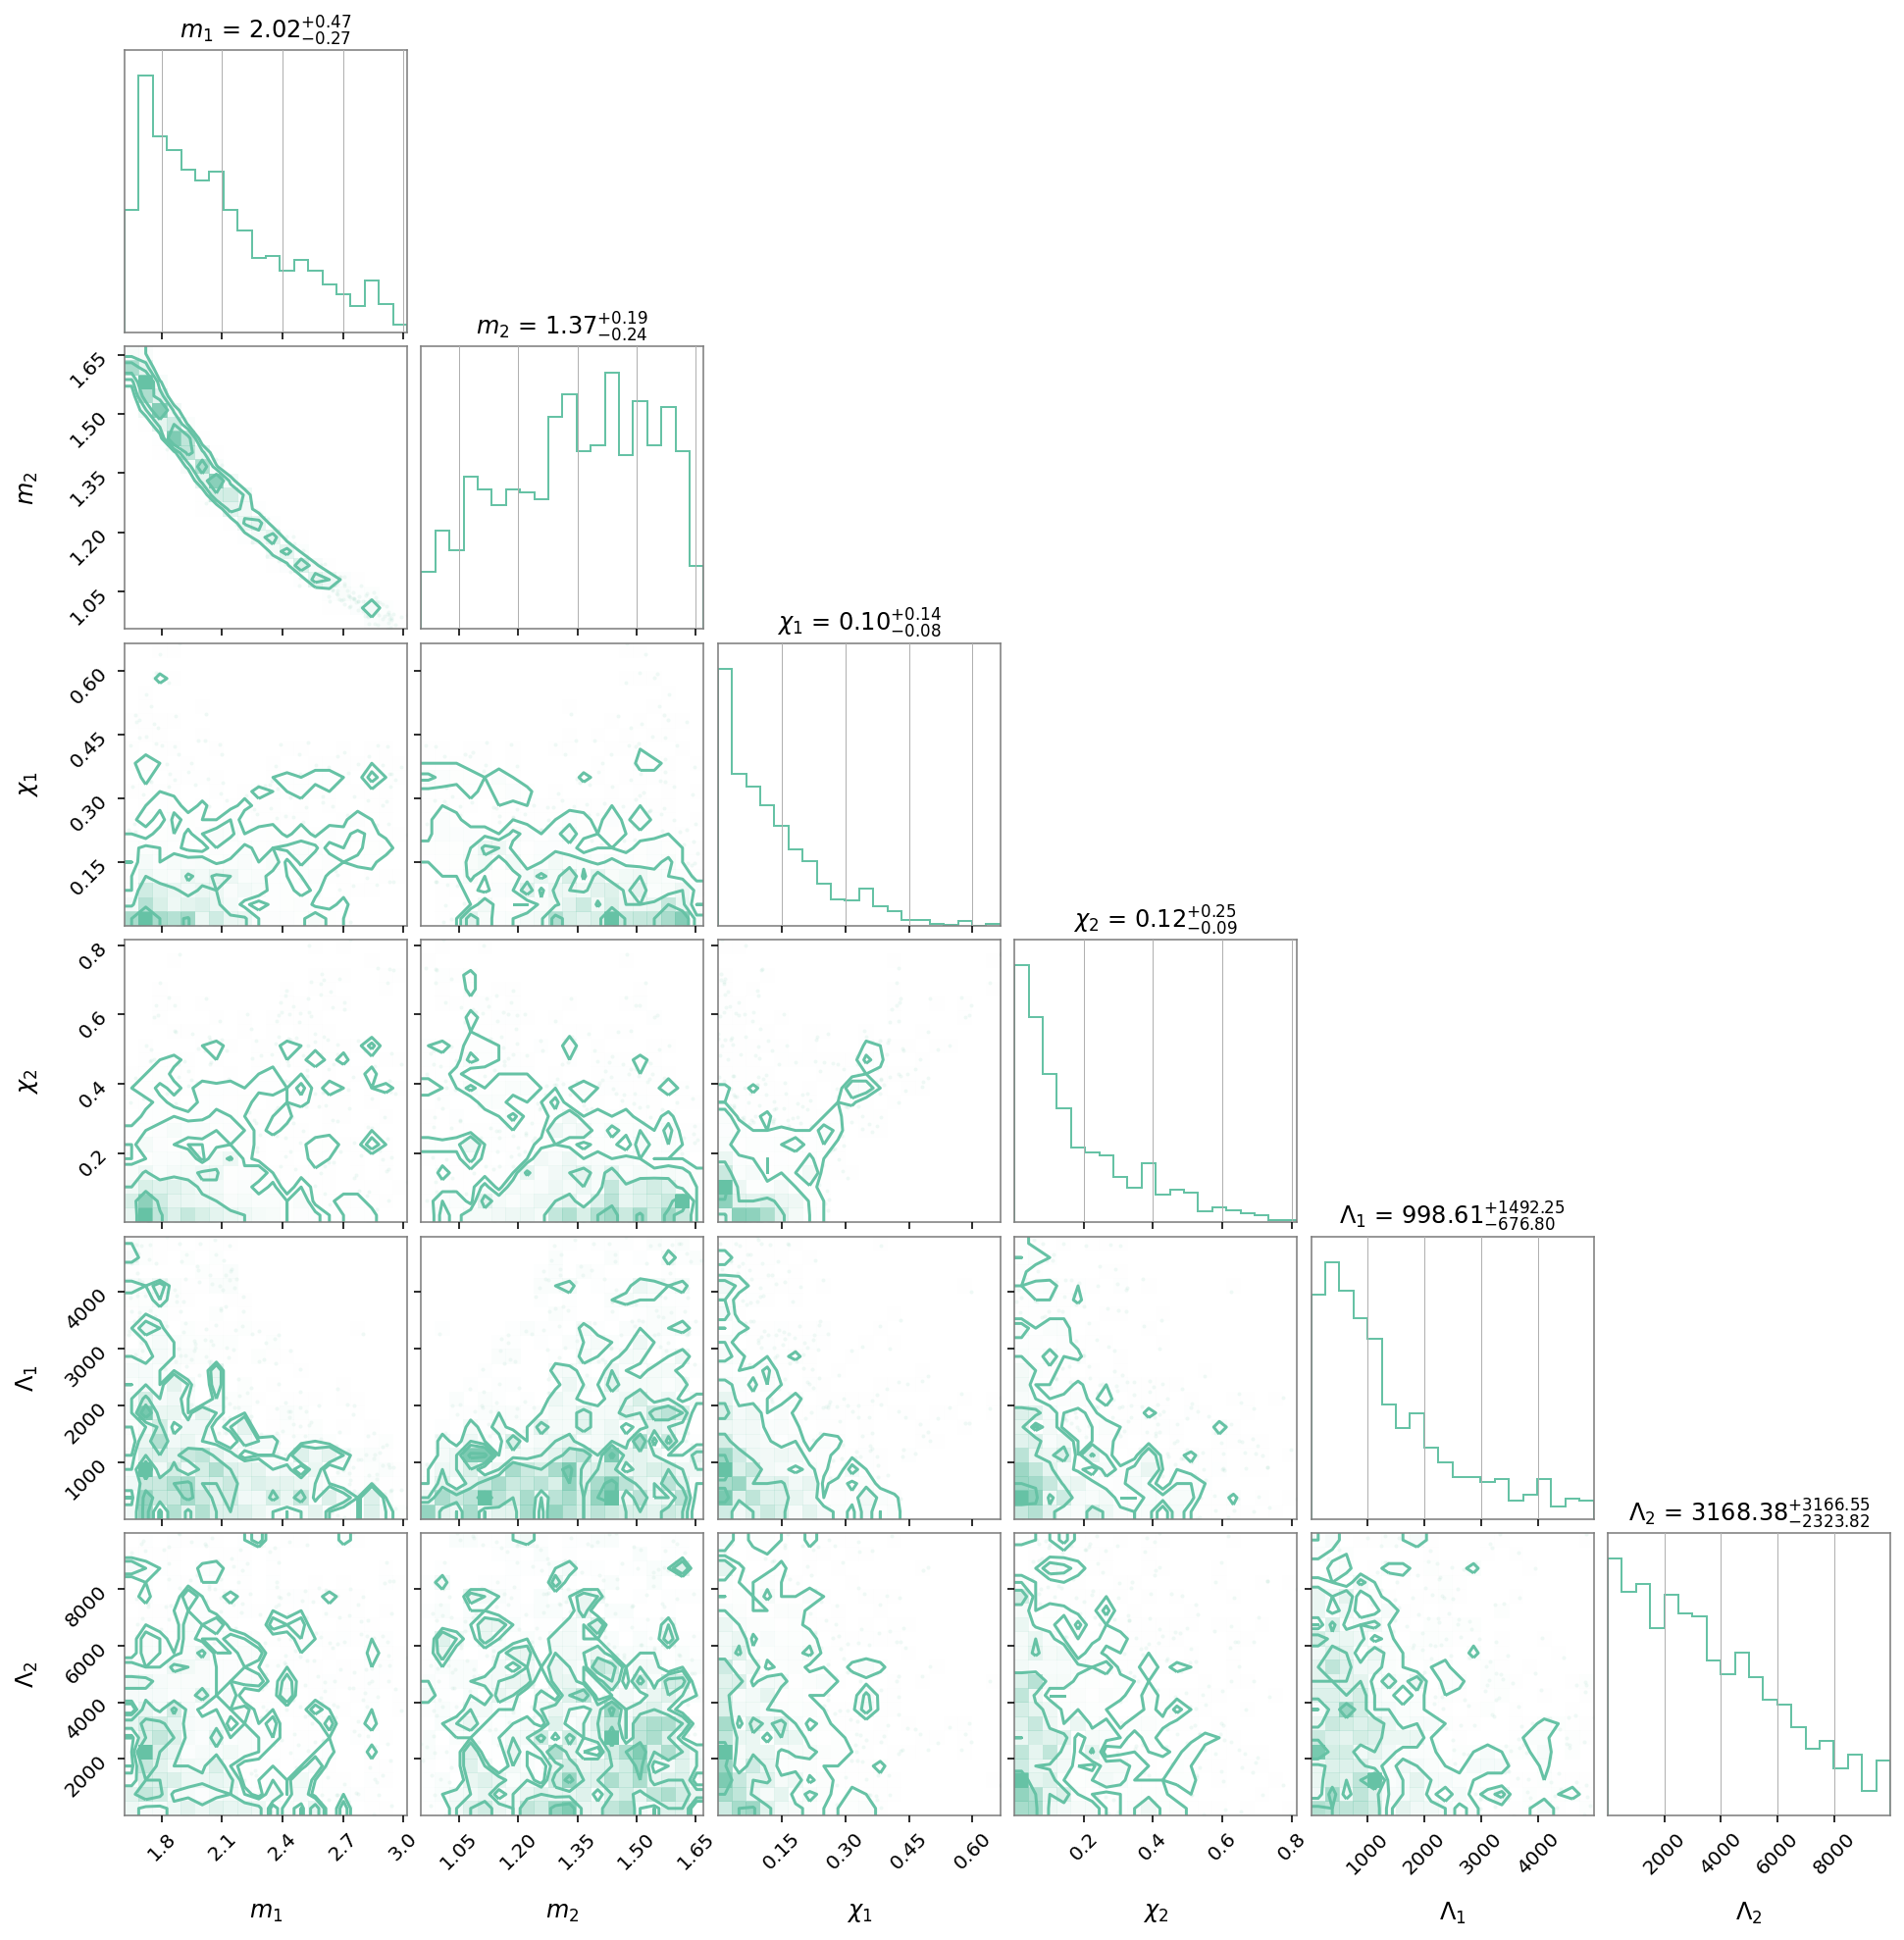

In [ ]:
cmap = plt.cm.get_cmap('Set2', 6) #cmap(0)
figure = corner.corner(data,color = cmap(0),var_names = ["mass_1_source", "mass_2_source",'a_1','a_2',"lambda_1", "lambda_2"],
                       labels = (r"$m_1$",r"$m_2$",r"$\chi_1$",r"$\chi_2$",r"$\Lambda_1$",r"$\Lambda_2$"),
                       show_titles=True)

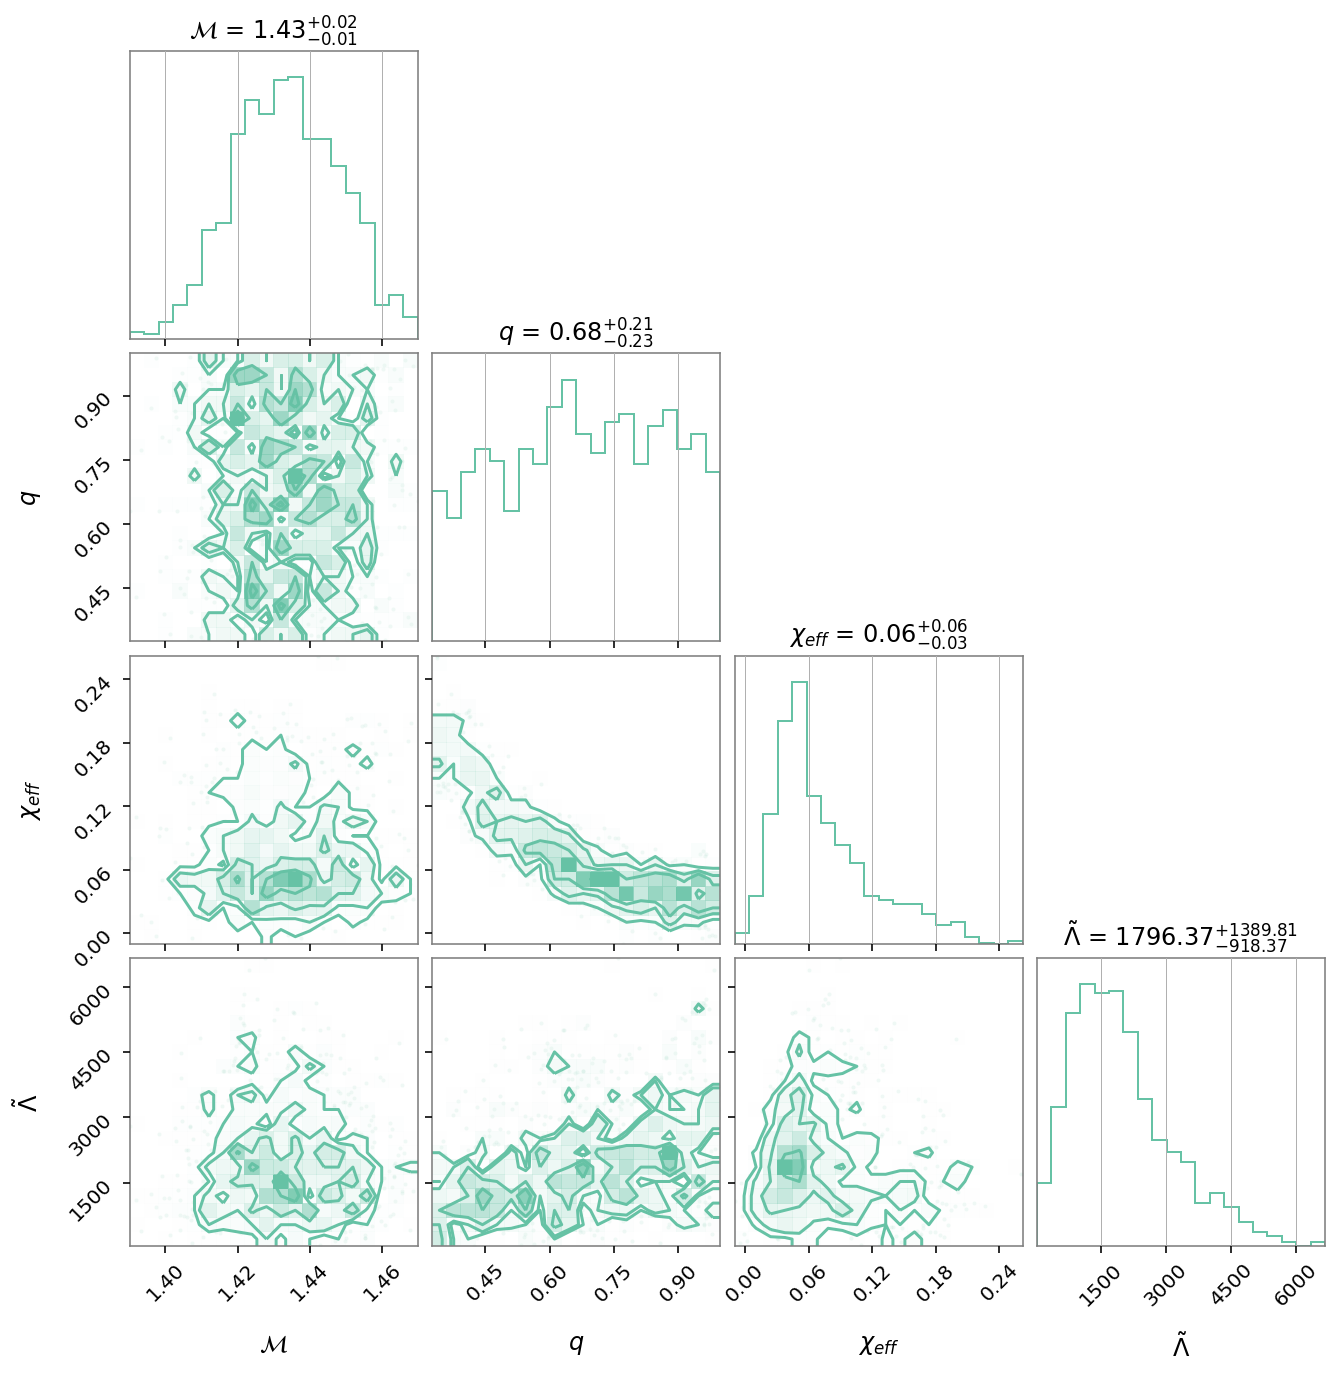

In [ ]:
figure = corner.corner(data,color = cmap(0),var_names = ["mchirp","q",'chi_eff',"lambdatilde"],
                       labels = (r"$\mathcal{M}$",r"$q$",r"$\chi_{eff}$",r"$\tilde\Lambda$"),
                       show_titles=True)

# Consider different Prior assumptions 

In [ ]:
old_prior_mass=prior.get_binary_mass_prior('flat_m1m2det') #function of m1, m2, lum_dist
new_prior_mass=pop.get_pop_prior('bimodcut_m1m2_snrcut') # function of m1, m2, lum_dist


# weight samples based on galactic mass prior
data['massweight']  = data.apply(lambda row :
                            new_prior_mass(row['mass_1_source'],row['mass_2_source'],row['luminosity_distance'])  
                            /  old_prior_mass(row['mass_1_source'],row['mass_2_source'],row['luminosity_distance']) 
                            , axis = 1)

# normalize the weights for distribution comparisons
data['massweight']=data['massweight']/data['massweight'].sum() * data['massweight'].size

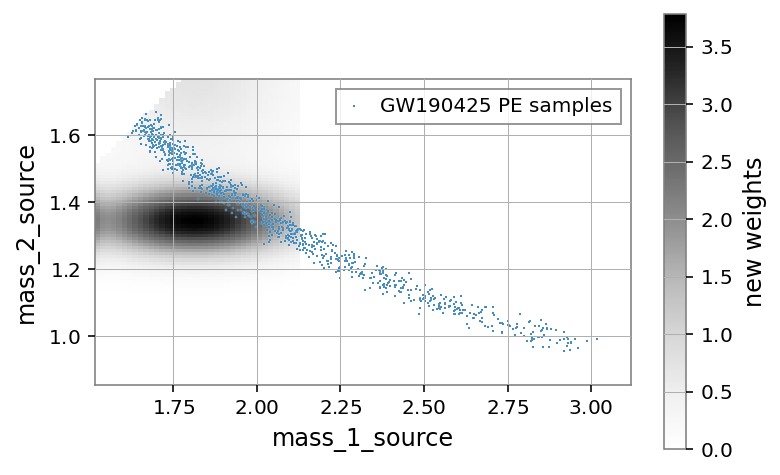

In [ ]:
x_coords = np.linspace(min(data['mass_1_source'])-0.1,max(data['mass_1_source'])+0.1,100)
y_coords = np.linspace(min(data['mass_2_source'])-0.1,max(data['mass_2_source'])+0.1,100)
X, Y = np.meshgrid(x_coords, y_coords)
avg_lumdist = data['luminosity_distance'].sum() / data['massweight'].size
Z = np.vectorize(new_prior_mass)(X,Y,avg_lumdist)

fig = plt.pcolormesh(x_coords, y_coords, Z, cmap='Greys')
fig.axes.set_aspect('equal')
plt.colorbar(label="new weights")

sns.scatterplot(data=data, x='mass_1_source', y='mass_2_source',  marker=",", s=1, label = "GW190425 PE samples") #fixed the label!
plt.legend()

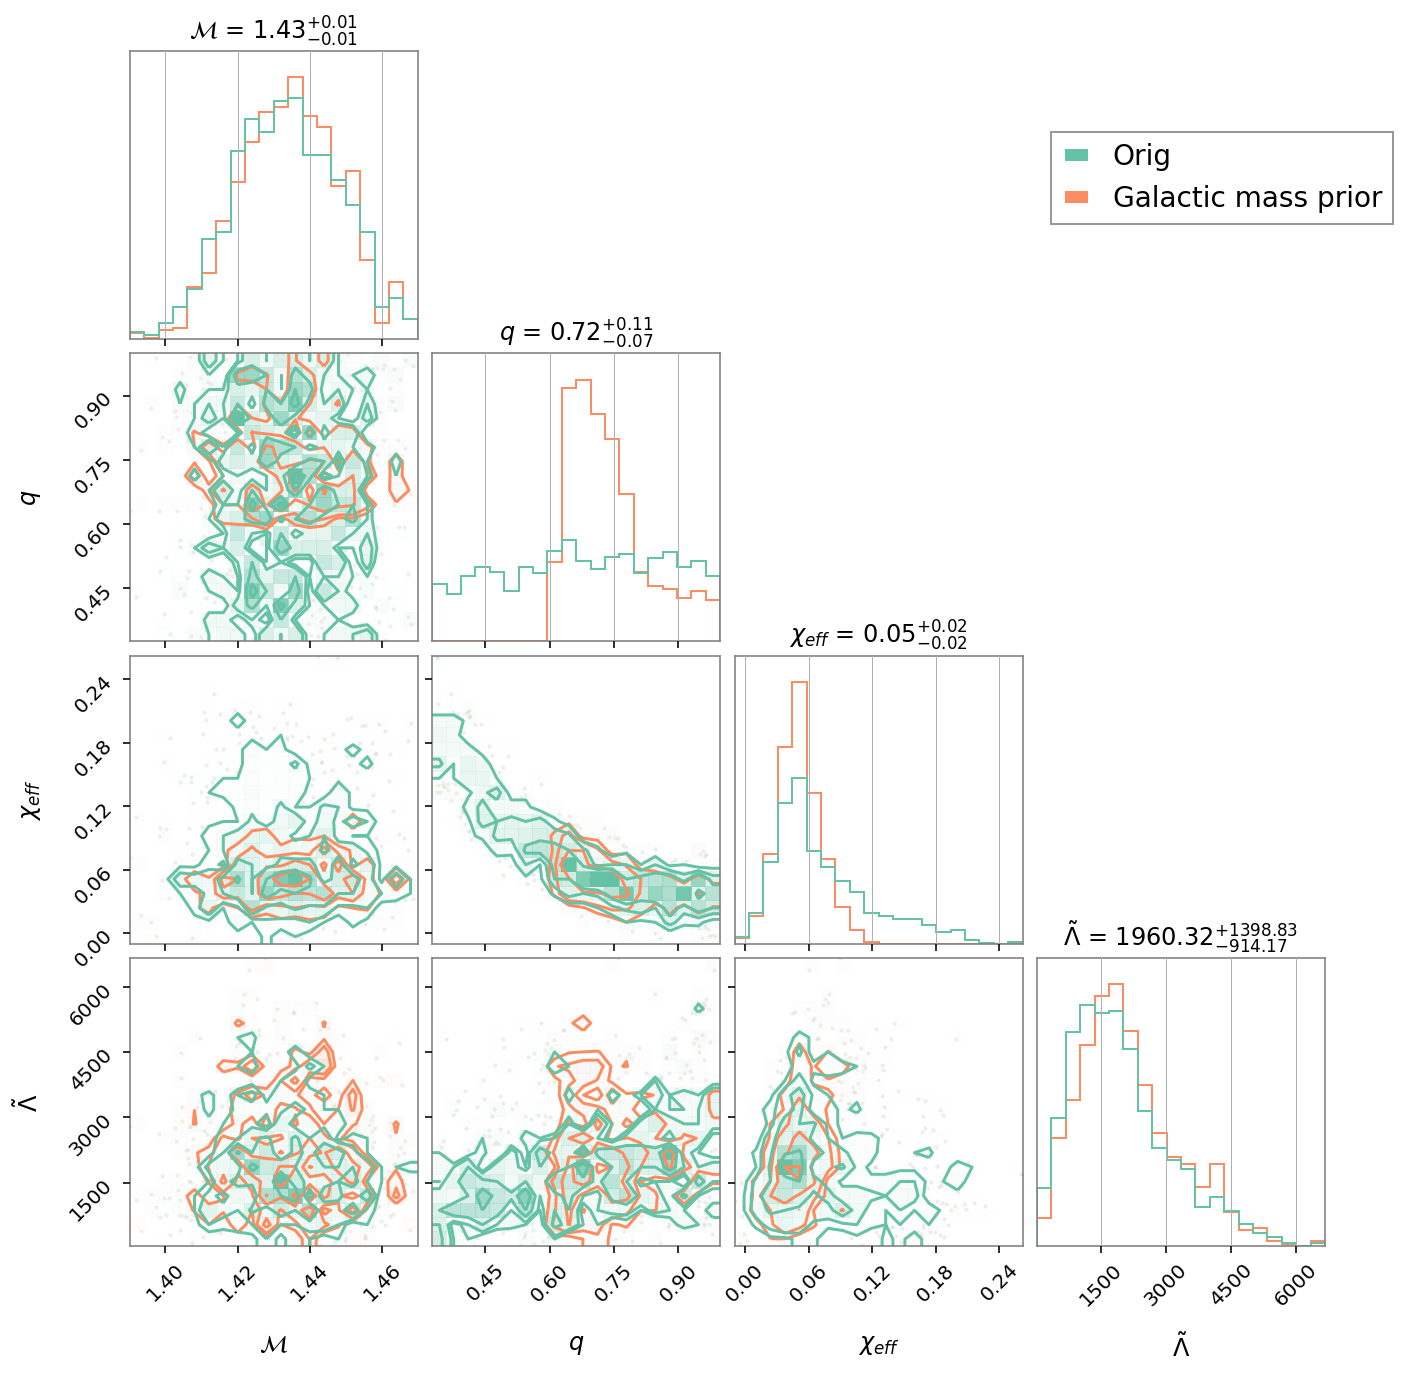

In [ ]:
figure = corner.corner(data,weights = data["massweight"], color = cmap(1),var_names = ["mchirp","q",'chi_eff',"lambdatilde"],
                       labels = (r"$\mathcal{M}$",r"$q$",r"$\chi_{eff}$",r"$\tilde\Lambda$"),
                       show_titles=True)
corner.corner(data,color = cmap(0),fig=figure, var_names = ["mchirp","q",'chi_eff',"lambdatilde"],
              labels = (r"$\mathcal{M}$",r"$q$",r"$\chi_{eff}$",r"$\tilde\Lambda$"))

l1 = mlines.Line2D([], [], color=cmap(0), label='Orig')
l2 = mlines.Line2D([], [], color=cmap(1), label='Galactic mass prior')
plt.legend(handles=[l1,l2],bbox_to_anchor=(0, 3.5,1,2), loc='lower left',fontsize= 14)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


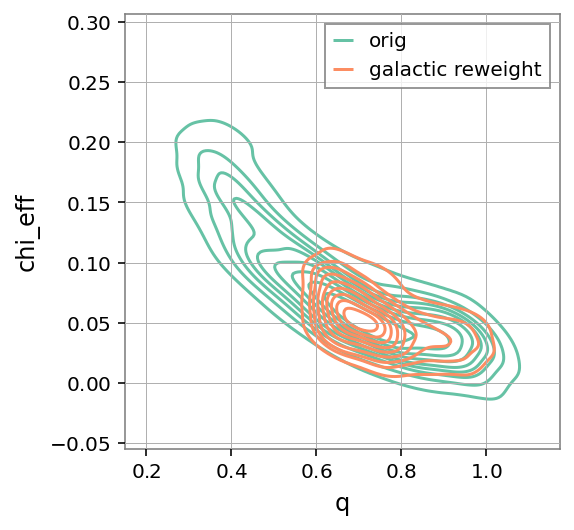

In [ ]:
fig = sns.kdeplot(data=data, x='q', y='chi_eff',  color=cmap(0), label='orig')
sns.kdeplot(data=data, x='q', y='chi_eff',  color=cmap(1), label='galactic reweight',
            weights = data['massweight'])
plt.axes().set_aspect(1./plt.axes().get_data_ratio())
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'aspect'
  **contour_kws,
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'aspect'
  **contour_kws,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


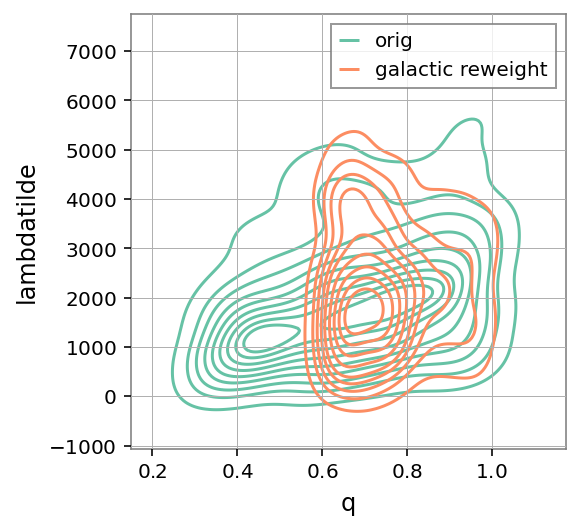

In [ ]:
fig = sns.kdeplot(data=data, x='q', y='lambdatilde',  color=cmap(0), label='orig',aspect=1)
sns.kdeplot(data=data, x='q', y='lambdatilde', color=cmap(1), label='galactic reweight',
            weights = data['massweight'],aspect=1)
plt.axes().set_aspect(1./plt.axes().get_data_ratio())
plt.legend()
plt.show()

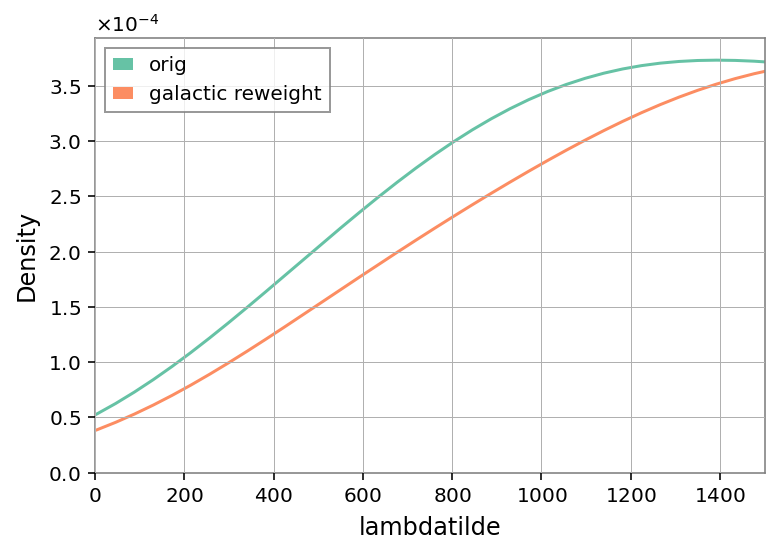

In [ ]:
sns.kdeplot(data=data, x='lambdatilde',  color=cmap(0), label='orig')
sns.kdeplot(data=data, x='lambdatilde',  color=cmap(1), label='galactic reweight',
            weights = data['massweight'])
plt.xlim(0,1500)
plt.legend()
plt.show()

In [ ]:
# since we sample uniformly in components, this is the prior on lambda_tilde
def unif_component_prior(q,z,Lmax1, Lmax2): 
    #Lambda-tilde is called z here for conciseness
    mtotal = 1+q
    m1fac= 1+12*q
    m2fac= q+12
    A = 16./13*(m1fac)/mtotal**(5)
    B = 16./13*(m2fac*q**(4))/mtotal**(5)
    norm = A*B *Lmax1*Lmax2
    return  (np.heaviside(z / A,1.) * ( 
        z + (A * Lmax1 - z) * np.heaviside(z/A - Lmax1,1.) ) - np.heaviside(z/A - B * Lmax2/A, 1.) * ( 
        z - B * Lmax2 + (A * Lmax1 + B * Lmax2 - z) * np.heaviside(z/A - (A * Lmax1 + B * Lmax2) / A,1.)) )/norm

# for GW170817 sampling here
Lmax=5000 # uniform prior maximum lambda for both components

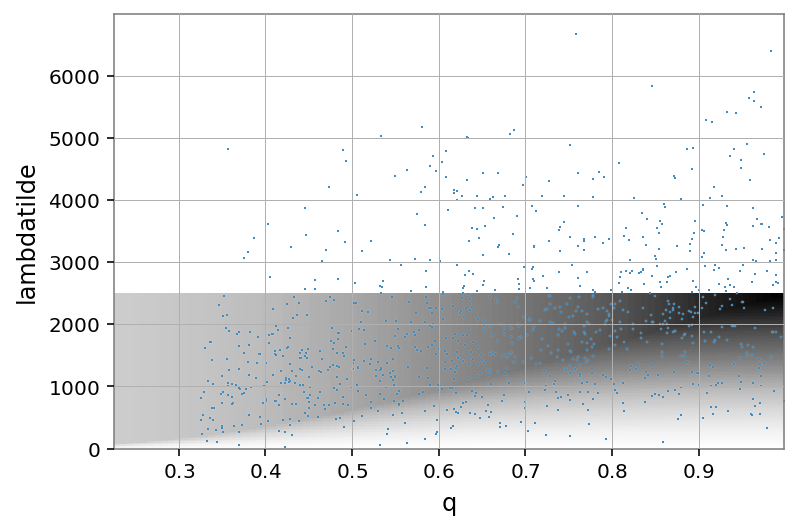

In [ ]:
x_coords = np.linspace(min(data['q']-0.1),max(data['q']),100)
y_coords = np.linspace(0,2500,100)
X, Y = np.meshgrid(x_coords, y_coords)
Z = np.vectorize(unif_component_prior)(X,Y,Lmax,Lmax)
fig = plt.pcolormesh(x_coords, y_coords, Z, cmap='Greys')

sns.scatterplot(data=data, x='q', y='lambdatilde',  marker=",", s=1)

In [ ]:
#reweight to a flat in lambda-tilde prior
data['lambdatweight']  = data.apply(lambda row : 
                                           1/unif_component_prior(row['q'],row['lambdatilde'],Lmax,Lmax), axis = 1)
data['lambdatweight']=data['lambdatweight']/data['lambdatweight'].sum() * data['lambdatweight'].size

print(data['lambdatweight']) #error

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: lambdatweight, Length: 1000, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored

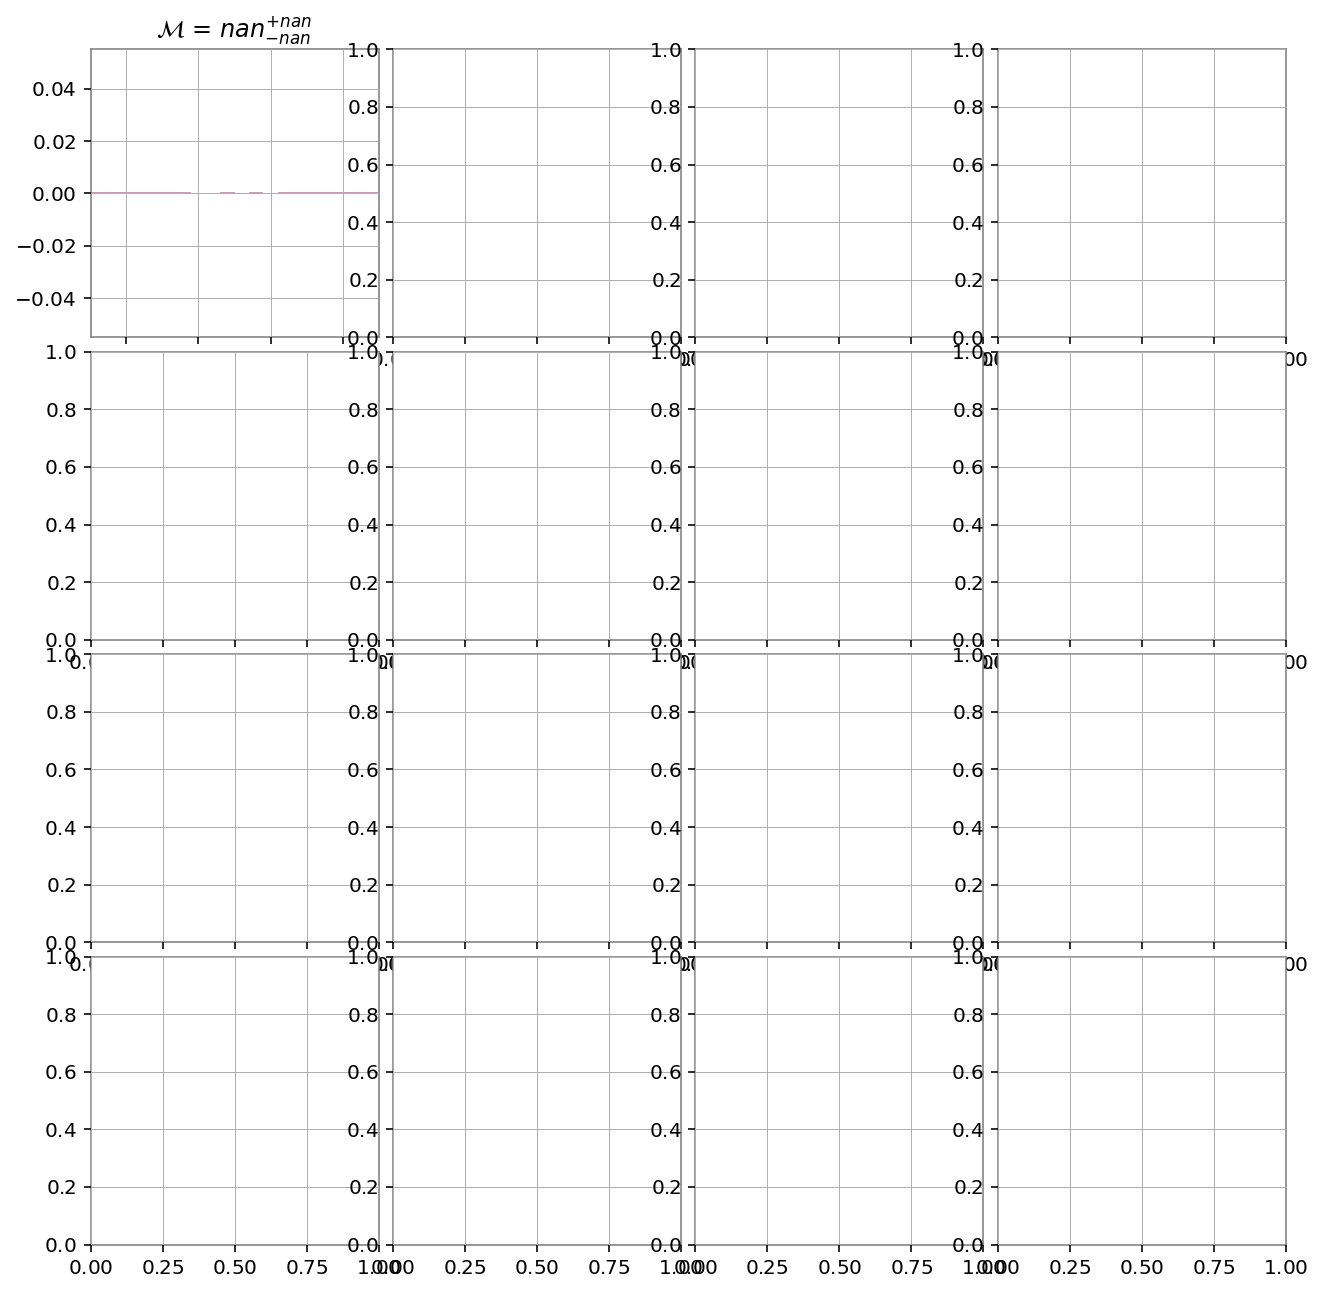

In [ ]:
figure = corner.corner(data, weights = data["lambdatweight"] ,color = cmap(2),var_names = ["mchirp","q",'chi_eff',"lambdatilde"], 
                       labels = (r"$\mathcal{M}$",r"$q$",r"$\chi_{eff}$",r"$\tilde\Lambda$"),
                       show_titles=True)
corner.corner(data,color = cmap(0),fig=figure, var_names = ["mchirp","q",'chi_eff',"lambdatilde"])

l1 = mlines.Line2D([], [], color=cmap(0), label='Orig')
l2 = mlines.Line2D([], [], color=cmap(2), label='flat prior on LambdaT')
plt.legend(handles=[l1,l2],bbox_to_anchor=(0, 3.5,1,2), loc='lower left',fontsize= 15)
plt.show()

In [ ]:
sns.kdeplot(data=data, x='lambdatilde',  color=cmap(0), label='orig',cut=0, clip=(0,1500))
sns.kdeplot(data=data, x='lambdatilde',  color=cmap(1), label='flat prior in lambda-tilde',
            weights = data['lambdatweight'],cut=0, clip=(0,1500))
plt.legend()
plt.show()

In [ ]:
figure = corner.corner(data,weights = data["lambdatweight"]*data["massweight"], color = cmap(2),var_names = ["mchirp","q",'chi_eff',"lambdatilde"])
corner.corner(data,color = cmap(0),fig=figure, var_names = ["mchirp","q",'chi_eff',"lambdatilde"],labels = (r"$\mathcal{M}$",r"$q$",r"$\chi_{eff}$",r"$\tilde\Lambda$"),
                       show_titles=True)

l1 = mlines.Line2D([], [], color=cmap(0), label='Orig')
l2 = mlines.Line2D([], [], color=cmap(2), label='galactic masses and flat lambdaT')
plt.legend(handles=[l1,l2],bbox_to_anchor=(0, 3.5,1,2), loc='lower left',fontsize= 15)
plt.show()

plt.show()

In [ ]:
sns.kdeplot(data=data, x='q', y='chi_eff',  color=cmap(0), label='orig')
sns.kdeplot(data=data, x='q', y='chi_eff', color=cmap(2), label='flat prior',
            weights = data['lambdatweight'])
sns.kdeplot(data=data, x='q', y='chi_eff',  color=cmap(1), label='galctic mass',
            weights = data['massweight'])

sns.kdeplot(data=data, x='q', y='chi_eff',color=cmap(3), label='galactic mass and flat prior',
            weights = data['massweight']*data['lambdatweight'])
plt.legend()
plt.show()

In [ ]:
sns.kdeplot(data=data, x='q', y='lambdatilde',  color=cmap(0), label='orig')
sns.kdeplot(data=data, x='q', y='lambdatilde',  color=cmap(2), label='flat prior',
            weights = data['lambdatweight'])
sns.kdeplot(data=data, x='q', y='lambdatilde',  color=cmap(1), label='galactic mass ',
            weights = data['massweight'])
sns.kdeplot(data=data, x='q', y='lambdatilde',  color=cmap(3), label='galactic mass and flat prior',
            weights = data['massweight']*data['lambdatweight'])
plt.legend()
plt.xlim(0,1500)
plt.show()

In [ ]:
sns.kdeplot(data=data, x='lambdatilde',  color=cmap(0), label='orig')
sns.kdeplot(data=data, x='lambdatilde',  color=cmap(2), label='flat prior',
            weights = data['lambdatweight'])
sns.kdeplot(data=data, x='lambdatilde',  color=cmap(1), label='galactic mass ',
            weights = data['massweight'])
sns.kdeplot(data=data, x='lambdatilde',  color=cmap(3), label='galactic mass and flat prior',
            weights = data['massweight']*data['lambdatweight'])
plt.legend()
plt.xlim(0,1500)
plt.show()